In [470]:
import numpy as np
import matplotlib.pyplot as plt

In [471]:
def solve(A, b, max_iter=1000, tol=1e-5, method='grad'):
    n = b.shape
    x = np.zeros(n)
    
    grad = A @ x - b
    norm = np.linalg.norm(grad)
    grads = np.array([abs(norm)])
    iter = 0
    
    while iter < max_iter and norm > tol:
        step = 0
        Ar = A @ grad
        
        if method == 'grad':
            step = np.dot(grad, grad) / np.dot(Ar, grad)
        elif method == 'res':
            step = np.dot(Ar, grad) / np.dot(Ar, Ar)
        else:
            raise ValueError('wrong method')
        
        x = x - step * grad
        
        grad = grad - step * Ar
        norm = np.linalg.norm(grad)
        grads = np.append(grads, abs(norm))
        
        iter += 1
    
    return x, grads
        

In [472]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [473]:
np.random.seed(1)

n = 120

A = np.random.randn(n, n)
A = A.T @ A

b = np.random.rand(n)

is_pos_def(A)

True

In [474]:
print('Итерационный способ1:')
%time x1, grads1 = solve(A, b)
print('Итерационный способ2:')
%time x2, grads2 = solve(A, b, method='res')
print('Точное решение с помощью встроенной функции:')
%time real_solution = np.linalg.solve(A, b)

Итерационный способ1:
CPU times: user 124 ms, sys: 8.11 ms, total: 132 ms
Wall time: 113 ms
Итерационный способ2:
CPU times: user 71 ms, sys: 819 µs, total: 71.9 ms
Wall time: 36.7 ms
Точное решение с помощью встроенной функции:
CPU times: user 447 µs, sys: 19 µs, total: 466 µs
Wall time: 239 µs


In [475]:
print('Первый способ:')
print(f'число итераций: {len(grads1)}')
print(f'ошибка: {np.linalg.norm(real_solution - x1)}')

Первый способ:
число итераций: 1001
ошибка: 32.06414795842829


In [476]:
print('Второй способ:')
print(f'число итераций: {len(grads2)}')
print(f'ошибка: {np.linalg.norm(real_solution - x2)}')

Второй способ:
число итераций: 1001
ошибка: 32.158926159751374


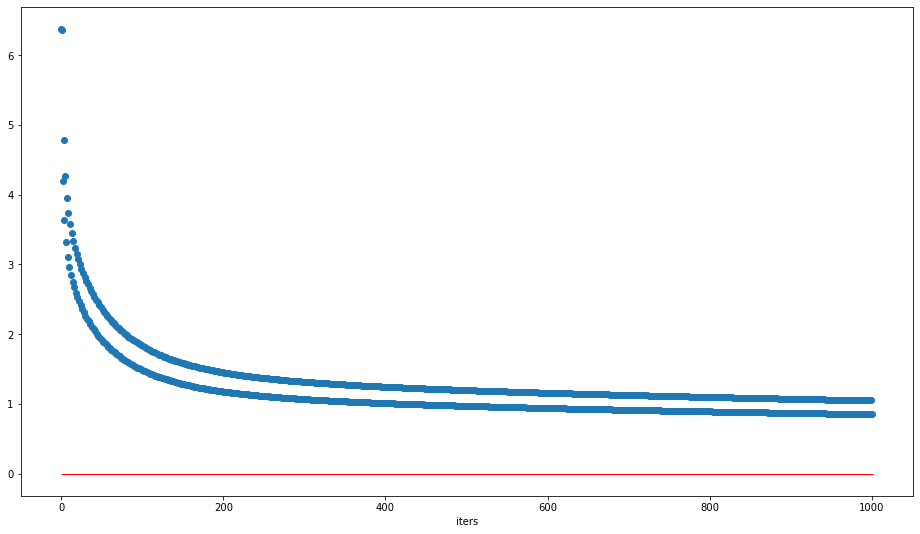

In [477]:
plt.figure(figsize=(16, 9))

plt.scatter(
    np.arange(len(grads1)),
    grads1
)

plt.xlabel('iters')
plt.hlines(y=0, xmin=0, xmax=len(grads1), color="r", linewidth=1)

plt.show()

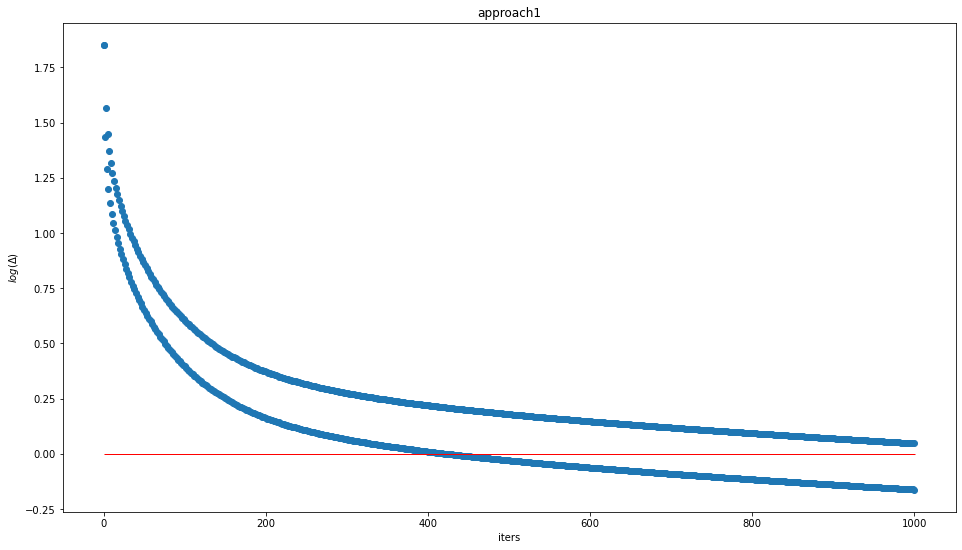

In [478]:
plt.figure(figsize=(16, 9))

plt.scatter(
    np.arange(len(grads1)),
    np.log(grads1)
)

plt.title('approach1')
plt.xlabel('iters')
plt.ylabel('$log(\Delta)$')
plt.hlines(y=0, xmin=0, xmax=len(grads1), color="r", linewidth=1)

plt.show()

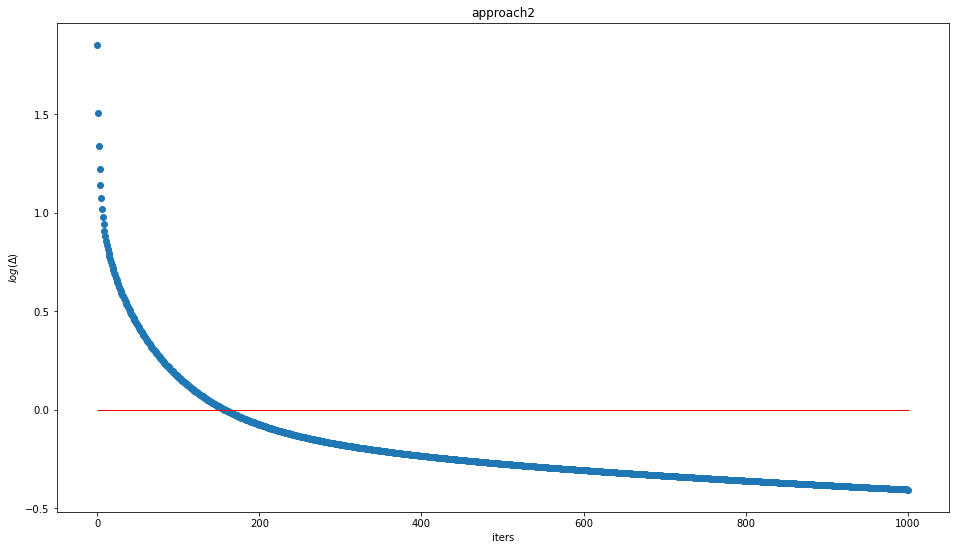

In [479]:
plt.figure(figsize=(16, 9))

plt.scatter(
    np.arange(len(grads2)),
    np.log(grads2)
)

plt.title('approach2')
plt.xlabel('iters')
plt.ylabel('$log(\Delta)$')
plt.hlines(y=0, xmin=0, xmax=len(grads1), color="r", linewidth=1)

plt.show()